In [13]:
import pickle
import numpy as np
import pandas as pd
from vmdpy import VMD
import tensorflow as tf
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers, layers, models, utils
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 1.0
session = tf.compat.v1.Session(config=config)

In [14]:
a12 = pd.read_csv("./Dataset/as/ones/a12.csv").iloc[:4864, 1:9].dropna().to_numpy()
a13 = pd.read_csv("./Dataset/as/ones/a13.csv").iloc[:4864, 1:9].dropna().to_numpy()
a11 = pd.read_csv("./Dataset/as/ones/Letter_A.csv").iloc[:4864, 1:9].dropna().to_numpy()
a21 = pd.read_csv("./Dataset/as/twos/a21.csv").iloc[:4864, 1:9].dropna().to_numpy()
a4 = pd.read_csv("./Dataset/as/fours/a4.csv").iloc[:4864, 1:9].dropna().to_numpy()

as_1 = pd.read_csv("./Dataset/dataset/as_1.csv").dropna().iloc[:2304, 1:9].to_numpy()

ak_1 = pd.read_csv("./Dataset/A11_K.csv").dropna().iloc[0:12032, 1:9].to_numpy()
ak_2 = pd.read_csv("./Dataset/A12_K.csv").dropna().iloc[0:12032, 1:9].to_numpy()

In [15]:
b12 = pd.read_csv("./Dataset/bs/ones/b12.csv").dropna().iloc[:4864, 1:9].to_numpy()
b13 = pd.read_csv("./Dataset/bs/ones/b13.csv").dropna().iloc[:4864, 1:9].to_numpy()
b11 = pd.read_csv("./Dataset/bs/ones/Letter_B.csv").dropna().iloc[:4864, 1:9].to_numpy()
b31 = pd.read_csv("./Dataset/bs/threes/b31.csv").dropna().iloc[:4864, 1:9].to_numpy()
b4 = pd.read_csv("./Dataset/bs/fours/b4.csv").dropna().iloc[:4864, 1:9].to_numpy()

bs_1 = pd.read_csv("./Dataset/dataset/bs_1.csv").dropna().iloc[:2304, 1:9].to_numpy()

bk_1 = pd.read_csv("./Dataset/B11_K.csv").dropna().iloc[:12032, 1:9].to_numpy()
bk_2 = pd.read_csv("./Dataset/B12_K.csv").dropna().iloc[:12032, 1:9].to_numpy()



In [16]:
base1s = pd.read_csv("./Dataset/baselines/Baseline_EEG.csv").dropna().iloc[:, 1:9]
base2s = pd.read_csv("./Dataset/baselines/rest2.csv").dropna().iloc[:, 1:9]
base3s = pd.read_csv("./Dataset/baselines/rest3.csv").dropna().iloc[:, 1:9]
base4s = pd.read_csv("./Dataset/baselines/base4.csv").dropna().iloc[:, 1:9]


base1s_1 = pd.read_csv("./Dataset/dataset/rest_s1.csv").dropna().iloc[:, 1:9]

base1k_1 = pd.read_csv("./Dataset/rest_eeg_K.csv").dropna().iloc[:, 1:9]

In [17]:
mean_1 = base1s.describe().iloc[1].to_numpy().reshape((1, 8))
std_1 = base1s.describe().iloc[2].to_numpy().reshape((1, 8))

mean_2 = base2s.describe().iloc[1].to_numpy().reshape((1, 8))
std_2 = base2s.describe().iloc[2].to_numpy().reshape((1, 8))

mean_3 = base3s.describe().iloc[1].to_numpy().reshape((1, 8))
std_3 = base3s.describe().iloc[2].to_numpy().reshape((1, 8))

mean_4 = base4s.describe().iloc[1].to_numpy().reshape((1, 8))
std_4 = base4s.describe().iloc[2].to_numpy().reshape((1, 8))

mean1_s = base1s_1.describe().iloc[1].to_numpy().reshape((1, 8))
std1_s = base1s_1.describe().iloc[2].to_numpy().reshape((1, 8))

mean1_k = base1k_1.describe().iloc[1].to_numpy().reshape((1, 8))
std1_k = base1k_1.describe().iloc[2].to_numpy().reshape((1, 8))

In [18]:
a12_new = np.zeros((19, 256, 8))
a13_new = np.zeros((19, 256, 8))
a11_new = np.zeros((19, 256, 8))
a21_new = np.zeros((19, 256, 8))
a4_new = np.zeros((19, 256, 8))
as_new = np.zeros((9, 256, 8))
ak1_new = np.zeros((46, 256, 8))
ak2_new = np.zeros((46, 256, 8))

b12_new = np.zeros((19, 256, 8))
b13_new = np.zeros((19, 256, 8))
b11_new = np.zeros((19, 256, 8))
b31_new = np.zeros((19, 256, 8))
b4_new = np.zeros((19, 256, 8))
bs_new = np.zeros((9, 256, 8))
bk1_new = np.zeros((46, 256, 8))
bk2_new = np.zeros((46, 256, 8))

for i in range(19):
    for j in range(256):
        for k in range(8):
            a12_new[i, j, k] = (a12[i+j, k] - mean_1[0, k])/std_1[0, k]
            a13_new[i, j, k] = (a13[i+j, k] - mean_1[0, k])/std_1[0, k]
            a11_new[i, j, k] = (a11[i+j, k] - mean_1[0, k])/std_1[0, k]
            a21_new[i, j, k] = (a21[i+j, k] - mean_2[0, k])/std_2[0, k]
            a4_new[i, j, k] = (a4[i+j, k] - mean_4[0, k])/std_4[0, k]



            b12_new[i, j, k] = (b12[i+j, k] - mean_1[0, k])/std_1[0, k]
            b13_new[i, j, k] = (b13[i+j, k] - mean_1[0, k])/std_1[0, k]
            b11_new[i, j, k] = (b11[i+j, k] - mean_1[0, k])/std_1[0, k]
            b31_new[i, j, k] = (b31[i+j, k] - mean_3[0, k])/std_3[0, k]
            b4_new[i, j, k] = (b4[i+j, k] - mean_4[0, k])/std_4[0, k]

for i in range(9):
    for j in range(256):
        for k in range(8):
            as_new[i, j, k] = (as_1[i+j, k] - mean1_s[0, k])/std1_s[0, k]
            bs_new[i, j, k] = (bs_1[i+j, k] - mean1_s[0, k])/std1_s[0, k]


for i in range(46):
    for j in range(256):
        for k in range(8):
            ak1_new[i, j, k] = (ak_1[i+j, k] - mean1_k[0, k])/std1_k[0, k]
            ak2_new[i, j, k] = (ak_2[i+j, k] - mean1_k[0, k])/std1_k[0, k]

            bk1_new[i, j, k] = (bk_1[i+j, k] - mean1_k[0, k])/std1_k[0, k]
            bk2_new[i, j, k] = (bk_2[i+j, k] - mean1_k[0, k])/std1_k[0, k]

In [19]:
all_a_s = np.concatenate((a12_new, a13_new, a11_new, a21_new, a4_new, as_new, ak1_new, ak2_new), axis = 0)
all_b_s = np.concatenate((b12_new, b13_new, b11_new, b31_new, b4_new, bs_new, bk1_new, bk2_new), axis = 0)

all_a_s = all_a_s.reshape((196, 256, 8))
all_b_s = all_b_s.reshape((196, 256, 8))

## VMD

In [20]:
def vmd_signals(input_mats):
    out_vmd = []
    fs = 256
    alpha = 500      # moderate bandwidth constraint  
    tau = 0           # noise-tolerance (no strict fidelity enforcement)  
    K = 7              # 7 modes  
    DC = 0             # no DC part imposed  
    init = 1           # initialize omegas uniformly  
    tol = 1e-7
    for i in range(input_mats.shape[0]):
        channel_list = []
        for j in range(8): # 8 channels
            u, _, _ = VMD(input_mats[i, :, j], alpha, tau, K, DC, init, tol)
            channel_list.append(u[:, 1]) # u[: ,1] because the required frequency was in that mode consistently
        out_vmd.append(channel_list)
    return out_vmd


# Recurrence Plot

In [21]:
def reccurence_plot(input_mats):
    out_mats = []
    for i in range(input_mats.shape[0]):
        transformer = RecurrencePlot()
        X_new = transformer.transform(input_mats[i, :, :])
        out_mats.append(X_new)
    return np.array(out_mats)

In [22]:
vmd_a_s = vmd_signals(all_a_s)
vmd_b_s = vmd_signals(all_b_s)

In [23]:
image_a_s = reccurence_plot(np.array(vmd_a_s))
image_b_s = reccurence_plot(np.array(vmd_b_s))
X = [image_a_s, image_b_s]
X = np.array(X).reshape(392, 1, 8, 7, 7)

In [24]:
num_of_output = 2
y = np.array([[0]*196, [1]*196]).reshape((392,))
y = utils.to_categorical(y, num_of_output)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=16)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

print(X_val.shape)
print(y_val.shape)

(250, 1, 8, 7, 7)
(250, 2)
(79, 1, 8, 7, 7)
(79, 2)
(63, 1, 8, 7, 7)
(63, 2)


In [27]:
with open("X_train_DL", 'wb') as fp:
    pickle.dump(X_train, fp)

with open("X_test_DL", 'wb') as fp:
    pickle.dump(X_test, fp)

with open("X_val_DL", 'wb') as fp:
    pickle.dump(X_val, fp)

with open("y_train_DL", 'wb') as fp:
    pickle.dump(y_train, fp)

with open("y_test_DL", 'wb') as fp:
    pickle.dump(y_test, fp)

with open("y_val_DL", 'wb') as fp:
    pickle.dump(y_val, fp)


In [28]:
input_shape = (1, 8, 7, 7)

opt = optimizers.Adam(  learning_rate=0.001,
                        beta_1=0.9,
                        beta_2=0.999,
                        epsilon=1e-07
                    )

input_1 = layers.Input(shape = input_shape, name = 'input_1')
permuted_input = layers.Permute((1, 3, 4, 2), name = 'permuted_input')(input_1)
conv3d_1 = layers.Conv3D(filters = 16, kernel_size = (8, 5, 5), padding = 'same', activation = 'relu', kernel_initializer = "glorot_uniform", name = 'conv3d_1')(permuted_input)
batch_1 = layers.BatchNormalization(name = 'batch_1')(conv3d_1)
maxpool_1 = layers.MaxPool3D(pool_size = (2, 2, 2), strides = (1, 1, 1), padding = 'same', name = 'maxpool_1')(batch_1)

conv3d_2 = layers.Conv3D(filters = 8, kernel_size = (4, 4, 4), padding = 'same', activation = 'relu', kernel_initializer = "glorot_uniform", name = 'conv3d_2')(maxpool_1)
batch_2 = layers.BatchNormalization(name = 'batch_2')(conv3d_2)
maxpool_2 = layers.MaxPool3D(pool_size = (2, 2, 2), strides = (1, 1, 1), padding = 'same', name = 'maxpool_2')(batch_2)

conv3d_3 = layers.Conv3D(filters = 8, kernel_size = (4, 3, 3), padding = 'same', activation = 'relu', kernel_initializer = "glorot_uniform", name = 'conv3d_3')(maxpool_2)
batch_3 = layers.BatchNormalization(name = 'batch_3')(conv3d_3)
maxpool_3 = layers.MaxPool3D(pool_size = (2, 2, 2), strides = (1, 1, 1), padding = 'same', name = 'maxpool_3')(batch_3)

flatten = layers.Flatten()(maxpool_3)

dense_1 = layers.Dense(units = 16, activation = 'relu')(flatten)
dense_2 = layers.Dense(units = 16, activation = 'relu')(dense_1)

output_layer = layers.Dense(num_of_output, activation="softmax")(dense_2)

eeg_model = models.Model(inputs=input_1, outputs=output_layer)
eeg_model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

eeg_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 8, 7, 7)]      0         
                                                                 
 permuted_input (Permute)    (None, 1, 7, 7, 8)        0         
                                                                 
 conv3d_1 (Conv3D)           (None, 1, 7, 7, 16)       25616     
                                                                 
 batch_1 (BatchNormalizatio  (None, 1, 7, 7, 16)       64        
 n)                                                              
                                                                 
 maxpool_1 (MaxPooling3D)    (None, 1, 7, 7, 16)       0         
                                                                 
 conv3d_2 (Conv3D)           (None, 1, 7, 7, 8)        8200      
                                                             

In [29]:
history =  eeg_model.fit(   x = X_train, y = y_train, 
                 batch_size = 8,
                 epochs = 10,
                 validation_data = (X_val, y_val))

Epoch 1/10
32/32 [==============================] - 2s 13ms/step - loss: 0.4727 - accuracy: 0.8240 - val_loss: 0.5317 - val_accuracy: 0.9365
Epoch 2/10
32/32 [==============================] - 0s 8ms/step - loss: 0.0873 - accuracy: 0.9920 - val_loss: 0.4016 - val_accuracy: 0.8413
Epoch 3/10
32/32 [==============================] - 0s 8ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.2251 - val_accuracy: 1.0000
Epoch 4/10
32/32 [==============================] - 0s 8ms/step - loss: 8.9315e-04 - accuracy: 1.0000 - val_loss: 0.1305 - val_accuracy: 1.0000
Epoch 5/10
32/32 [==============================] - 0s 8ms/step - loss: 4.2419e-04 - accuracy: 1.0000 - val_loss: 0.0754 - val_accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 0s 9ms/step - loss: 2.9752e-04 - accuracy: 1.0000 - val_loss: 0.0392 - val_accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 0s 9ms/step - loss: 2.1443e-04 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 1.0000
Epo

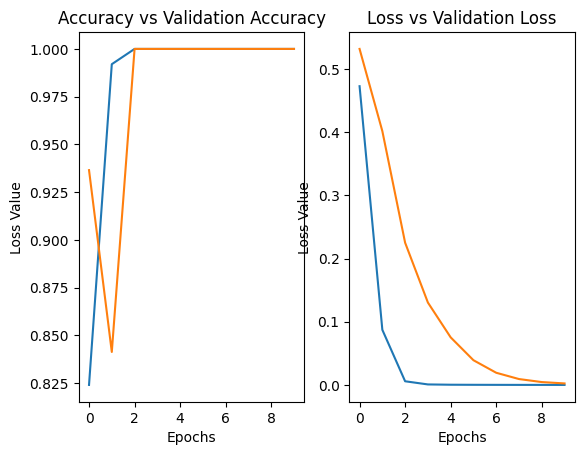

In [30]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title("Accuracy vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title("Loss vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.show()

3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        38

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79



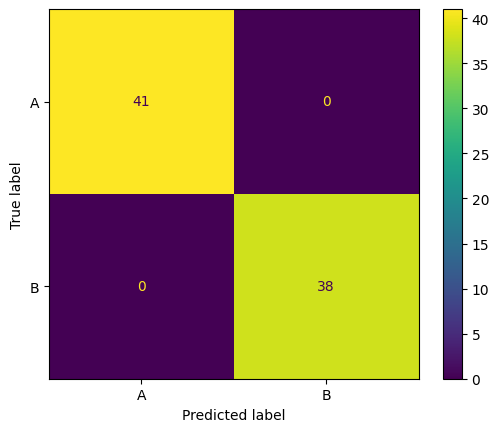

In [44]:
y_pred = eeg_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
# Classification Report
print(classification_report(y_test, y_pred)) 

conf_mat = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ["A", "B"])
cm_display.plot()
plt.show()

In [45]:
eeg_model.save("eeg_model_100_all.h5")

c:\Users\Shreyas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
